In [128]:
import pandas as pd
import seaborn as sns

In [23]:
df = pd.read_excel("201710_emissao_passagens_scdp.xlsx", skiprows=3)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50408 entries, 0 to 50407
Data columns (total 23 columns):
 Código do órgão superior                                                                                           50407 non-null object
                               Nome do órgão superior                                                               50405 non-null object
 Código do órgão solicitante da viagem                                                                              50405 non-null float64
                                      Nome do órgão solicitante da viagem                                           50405 non-null object
    N. PCDP                                                                                                         50405 non-null object
 N. Reserva/Localizador                                                                                             50405 non-null object
  Data Emissão Bilhete                                        

In [137]:
df.columns = df.columns.str.strip()

In [46]:
# explorando os dados - tail: exibe as 5 ultimas colunas
df.tail()

,Código do órgão superior,Nome do órgão superior,Código do órgão solicitante da viagem,Nome do órgão solicitante da viagem,N. PCDP,N. Reserva/Localizador,Data Emissão Bilhete,Data Embarque,Valor Tarifa Comercial,Percentual Desconto Aplicado,...,Companhia Aérea,Classe Tarifária Bilhete,Regra Tarifária,No Show,Remarcado,Cancelado,Valor Multas,Valor Reembolso,Diferença de Tarifa,Situação Final Bilhete
50403,219924,Secretaria-Geral da Presidência da República ...,34889.0,Diretoria de Recursos Logísticos ...,000188/17,KD6EE6,2017-10-18 10:10:02.284,2017-10-26 09:35:00,454.93,0.0,...,LATAM AIRLINES BRASIL,X,http://t.umail.com.br/ClickHere/ViewEmail.asp...,Não,Não,Não,0.0,0.0,0.0,Andamento
50404,219924,Secretaria-Geral da Presidência da República ...,34889.0,Diretoria de Recursos Logísticos ...,000188/17,OEWY8V,2017-10-18 10:09:20.946,2017-10-22 09:50:00,782.90,0.0,...,GOL Linhas Aéreas Inteligentes,W,https://www.voegol.com.br/pt/informacoes/tari...,Não,Não,Não,0.0,0.0,0.0,Andamento
50405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50406,* Dados obtidos em Outubro/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50407,* Dados retiradas do SCDP com base em informaç...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# explorando os dados e verificando os tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50408 entries, 0 to 50407
Data columns (total 23 columns):
Código do órgão superior                 50407 non-null object
Nome do órgão superior                   50405 non-null object
Código do órgão solicitante da viagem    50405 non-null float64
Nome do órgão solicitante da viagem      50405 non-null object
N. PCDP                                  50405 non-null object
N. Reserva/Localizador                   50405 non-null object
Data Emissão Bilhete                     50405 non-null object
Data Embarque                            50405 non-null object
Valor Tarifa Comercial                   50405 non-null float64
Percentual Desconto Aplicado             50405 non-null float64
Valor Tarifa Governo                     50405 non-null float64
Valor Tarifa Embarque                    50405 non-null float64
Valor Bilhete                            50405 non-null float64
Companhia Aérea                          50405 non-null object
Cla

In [136]:
df['Data Embarque'] = pd.to_datetime(df['Data Embarque'], format='%Y-%m-%d %H:%M:%S') 

ValueError: cannot convert float NaN to integer

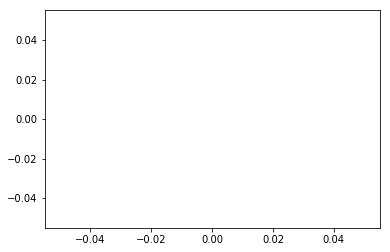

In [139]:
sns.distplot(df['Valor Bilhete'])

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50408 entries, 0 to 50407
Data columns (total 23 columns):
Código do órgão superior                 50407 non-null object
Nome do órgão superior                   50405 non-null object
Código do órgão solicitante da viagem    50405 non-null float64
Nome do órgão solicitante da viagem      50405 non-null object
N. PCDP                                  50405 non-null object
N. Reserva/Localizador                   50405 non-null object
Data Emissão Bilhete                     50405 non-null object
Data Embarque                            50405 non-null datetime64[ns]
Valor Tarifa Comercial                   50405 non-null float64
Percentual Desconto Aplicado             50405 non-null float64
Valor Tarifa Governo                     50405 non-null float64
Valor Tarifa Embarque                    50405 non-null float64
Valor Bilhete                            50405 non-null float64
Companhia Aérea                          50405 non-null ob

In [51]:
# Quantidade de passagens por orgao superior
df_agrupado_codigo = df.groupby('Nome do órgão superior')
df_agrupado_codigo

In [52]:
# somatorio do VALOR TARIFA COMERCIAL por orgao
df_agrupado_codigo['Valor Tarifa Comercial'].sum()

Nome do órgão superior
 Advocacia-Geral da União                                                                 309573.65
 Agência Nacional de Aviação Civil                                                        594578.76
 Agência Nacional de Energia Elétrica                                                     105003.94
 Agência Nacional de Saúde Suplementar                                                    121325.73
 Agência Nacional de Telecomunicações                                                     169151.14
 Agência Nacional de Transportes Aquaviários                                               49856.90
 Agência Nacional de Transportes Terrestres                                               204722.89
 Agência Nacional de Vigilância Sanitária                                                 311491.49
 Agência Nacional do Cinema                                                                37852.36
 Agência Nacional do Petróleo, Gás Natural e Biocombustíveis                 

In [53]:
# somatorio do VALOR TARIFA GOVERNO por orgao
df_agrupado_codigo['Valor Tarifa Governo'].sum()

Nome do órgão superior
 Advocacia-Geral da União                                                                 304031.69
 Agência Nacional de Aviação Civil                                                        586118.37
 Agência Nacional de Energia Elétrica                                                     102552.06
 Agência Nacional de Saúde Suplementar                                                    118044.06
 Agência Nacional de Telecomunicações                                                     165766.07
 Agência Nacional de Transportes Aquaviários                                               49202.32
 Agência Nacional de Transportes Terrestres                                               203334.51
 Agência Nacional de Vigilância Sanitária                                                 304373.59
 Agência Nacional do Cinema                                                                37046.83
 Agência Nacional do Petróleo, Gás Natural e Biocombustíveis                 

In [54]:
# somatorio do VALOR TARIFA EMBARQUE por orgao
df_agrupado_codigo['Valor Tarifa Embarque'].sum()

Nome do órgão superior
 Advocacia-Geral da União                                                                14788.23
 Agência Nacional de Aviação Civil                                                       31916.94
 Agência Nacional de Energia Elétrica                                                     4729.23
 Agência Nacional de Saúde Suplementar                                                    6513.91
 Agência Nacional de Telecomunicações                                                     7575.76
 Agência Nacional de Transportes Aquaviários                                              2230.76
 Agência Nacional de Transportes Terrestres                                               8924.57
 Agência Nacional de Vigilância Sanitária                                                17489.06
 Agência Nacional do Cinema                                                               3103.00
 Agência Nacional do Petróleo, Gás Natural e Biocombustíveis                              8894.

In [55]:
df_agrupado_codigo['Valor Bilhete'].sum()

Nome do órgão superior
 Advocacia-Geral da União                                                                 318819.92
 Agência Nacional de Aviação Civil                                                        618035.31
 Agência Nacional de Energia Elétrica                                                     107281.29
 Agência Nacional de Saúde Suplementar                                                    124557.97
 Agência Nacional de Telecomunicações                                                     173341.83
 Agência Nacional de Transportes Aquaviários                                               51433.08
 Agência Nacional de Transportes Terrestres                                               212259.08
 Agência Nacional de Vigilância Sanitária                                                 321862.65
 Agência Nacional do Cinema                                                                40149.83
 Agência Nacional do Petróleo, Gás Natural e Biocombustíveis                 

In [118]:
# Quantidade de cada Situação Final Bilhete por órgão
df_agrupado_codigo['Situação Final Bilhete'].value_counts()

ImportError: matplotlib is required for plotting.

In [56]:
df_agrupado_companhia_aerea = df.groupby('Companhia Aérea')

In [57]:
# somatorio do VALOR TARIFA COMERCIAL por companhia aerea
df_agrupado_companhia_aerea['Valor Tarifa Comercial'].sum()

Companhia Aérea
 AVIANCA S.A.                             5.270300e+06
 AZUL LINHAS AÉREAS BRASILEIRA            7.951178e+06
 GOL Linhas Aéreas Inteligentes           1.252865e+07
 Gol OU Latam - Parceria com Terceiro     1.559996e+05
 LATAM AIRLINES BRASIL                    8.086123e+06
 MAP TRANSPORTES AEREOS LTDA - MAP        1.961120e+05
Name: Valor Tarifa Comercial, dtype: float64

In [58]:
# somatorio do VALOR TARIFA GOVERNO por companhia aerea
df_agrupado_companhia_aerea['Valor Tarifa Governo'].sum()

Companhia Aérea
 AVIANCA S.A.                             4.980484e+06
 AZUL LINHAS AÉREAS BRASILEIRA            7.709556e+06
 GOL Linhas Aéreas Inteligentes           1.241002e+07
 Gol OU Latam - Parceria com Terceiro     1.559996e+05
 LATAM AIRLINES BRASIL                    8.086123e+06
 MAP TRANSPORTES AEREOS LTDA - MAP        1.960995e+05
Name: Valor Tarifa Governo, dtype: float64

In [59]:
# somatorio do VALOR BILHETE por companhia aerea
df_agrupado_companhia_aerea['Valor Bilhete'].sum()

Companhia Aérea
 AVIANCA S.A.                              5245246.64
 AZUL LINHAS AÉREAS BRASILEIRA             8020100.45
 GOL Linhas Aéreas Inteligentes           12936609.65
 Gol OU Latam - Parceria com Terceiro       162520.18
 LATAM AIRLINES BRASIL                     8457533.31
 MAP TRANSPORTES AEREOS LTDA - MAP          202197.21
Name: Valor Bilhete, dtype: float64

In [63]:
# valor médio da coluna VALOR BILHETE por companhia aerea
df_agrupado_companhia_aerea['Valor Bilhete'].mean()

Companhia Aérea
 AVIANCA S.A.                             580.997634
 AZUL LINHAS AÉREAS BRASILEIRA            731.293923
 GOL Linhas Aéreas Inteligentes           736.373500
 Gol OU Latam - Parceria com Terceiro     608.689813
 LATAM AIRLINES BRASIL                    687.548436
 MAP TRANSPORTES AEREOS LTDA - MAP        737.946022
Name: Valor Bilhete, dtype: float64

In [64]:
# valor mínimo da coluna VALOR BILHETE por companhia aerea
df_agrupado_companhia_aerea['Valor Bilhete'].min()

Companhia Aérea
 AVIANCA S.A.                             120.18
 AZUL LINHAS AÉREAS BRASILEIRA             99.64
 GOL Linhas Aéreas Inteligentes           103.39
 Gol OU Latam - Parceria com Terceiro     152.45
 LATAM AIRLINES BRASIL                      0.00
 MAP TRANSPORTES AEREOS LTDA - MAP        249.90
Name: Valor Bilhete, dtype: float64

In [65]:
# valor máximo da coluna VALOR BILHETE por companhia aerea
df_agrupado_companhia_aerea['Valor Bilhete'].max()

Companhia Aérea
 AVIANCA S.A.                             2993.84
 AZUL LINHAS AÉREAS BRASILEIRA            4083.61
 GOL Linhas Aéreas Inteligentes           4053.19
 Gol OU Latam - Parceria com Terceiro     1843.35
 LATAM AIRLINES BRASIL                    3319.07
 MAP TRANSPORTES AEREOS LTDA - MAP        1729.70
Name: Valor Bilhete, dtype: float64

In [138]:
# quantidade de embarques noturnos por companhia aerea
df_dt_embarque = df[df['Data Embarque'].dt.hour > 18]
df_dt_embarque['Companhia Aérea'].value_counts()


 GOL Linhas Aéreas Inteligentes           3463
 LATAM AIRLINES BRASIL                    2429
 AVIANCA S.A.                             1733
 AZUL LINHAS AÉREAS BRASILEIRA            1563
 Gol OU Latam - Parceria com Terceiro       44
 MAP TRANSPORTES AEREOS LTDA - MAP          40
Name: Companhia Aérea, dtype: int64

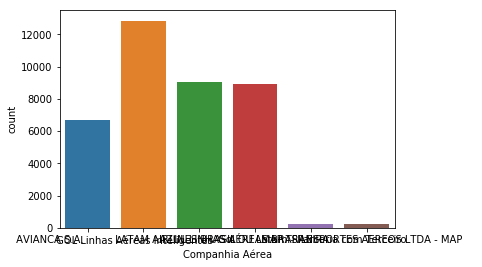

In [129]:
# Quantidade de embarques diurnos por companhia aerea

import matplotlib as plt
%matplotlib inline  
df_dt_embarque = df[df['Data Embarque'].dt.hour < 18]
df_dt_embarque['Companhia Aérea'].value_counts()
sns.countplot(x='Companhia Aérea', data=df_dt_embarque)

In [115]:
plt.bar(df_dt_embarque)
plt.show()

TypeError: bar() missing 1 required positional argument: 'height'